# ME449 HW1 - Zhengyang Kris Weng Submission 10/13/2024

## Part 1A:
Please see file attachment.

## Part 1B:

I've changed the text labels on the UI to be more playful.
Line # 258, 262, 266, 273 have been changed.

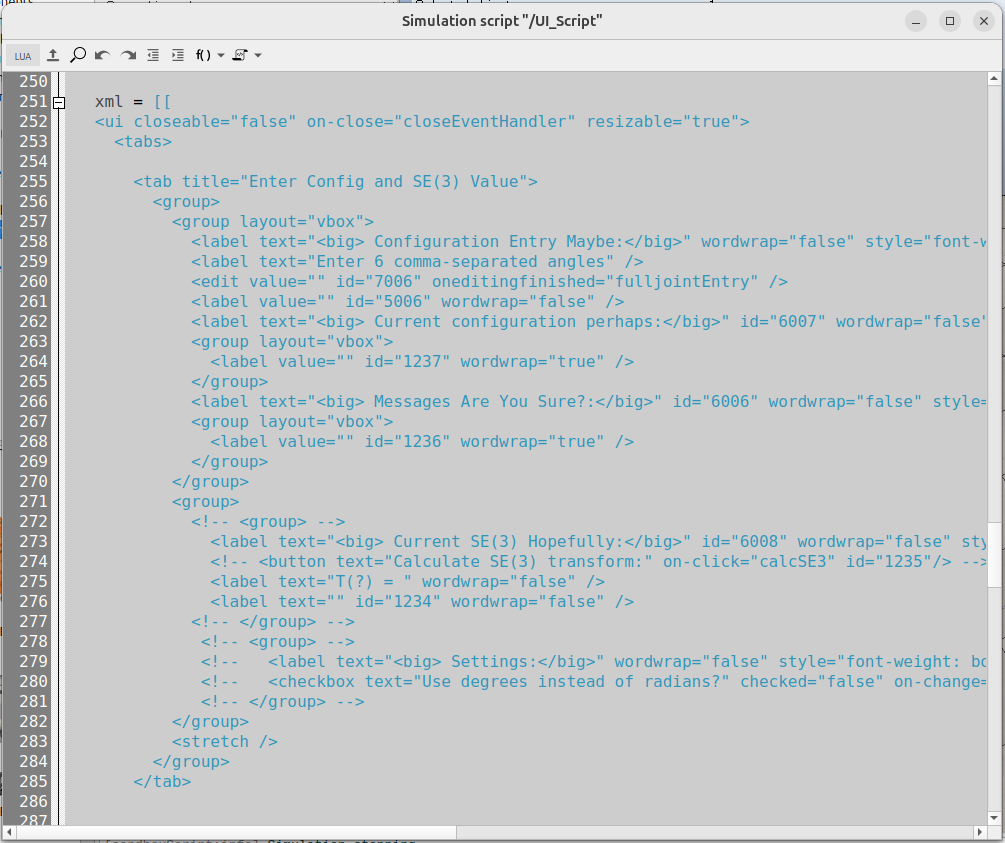


Updated UI window and UR5 configurations:

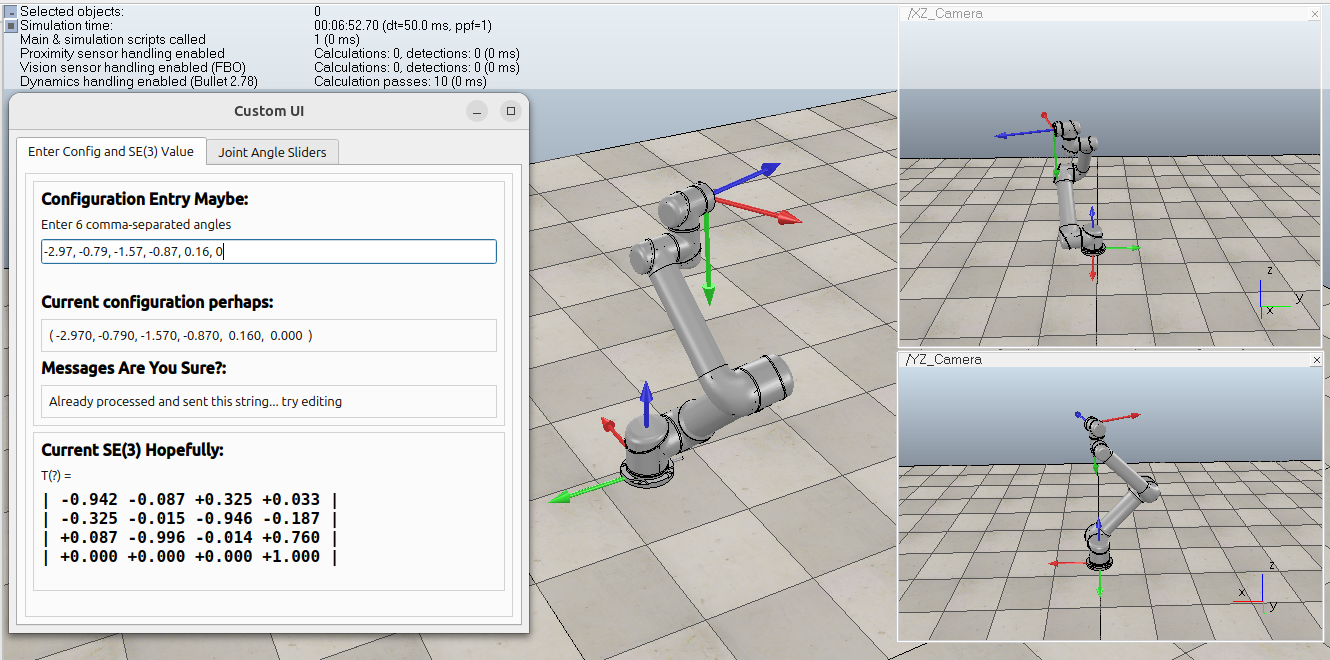

## Part 2

Joint angles: [-2.97, -0.79, -1.57, -0.87, 0.16, 0]

I first found the i to i+1 joint angles by piecing given SO3 matrices together. Through simple matrix operations I found all 7 joint rotations. To find the specific joint angles $theta_i$ associated with each rotation, I used MatrixLog3() to find their so(3) skew-symmetric expression respectively, then so3toVec() to find the 3-vector notation of joint rotation. The theta value can be found from this vector.

I also computed the R_sb rotation using the given information to check with the computed SO(3) in CoppeliaSim UI.

Code implementation:

In [2]:
import modern_robotics as mr
import numpy as np

# Set NumPy print options to limit float precision to 2 decimal places
np.set_printoptions(precision=2, suppress=True)

######### Part 2 ############

# provided information
r_13 = np.array([[-0.7071, 0, -0.7071], [0, 1, 0], [0.7071, 0, -0.7071]])
r_s2 = np.array([[-0.6964, 0.1736, 0.6964], [-0.1228, -0.9848, 0.1228], [0.7071, 0, 0.7071]])
r_25 = np.array([[-0.7566, -0.1198, -0.6428], [-0.1564, 0.9877, 0], [0.6348, 0.1005, -0.7661]])
r_12 = np.array([[0.7071, 0, -0.7071], [0, 1, 0], [0.7071, 0, 0.7071]])
r_34 = np.array([[0.6428, 0, -0.7660], [0, 1, 0], [0.7660, 0, 0.6428]])
r_s6 = np.array([[0.9418, 0.3249, -0.0859], [0.3249, -0.9456, -0.0151], [-0.0861, -0.0136, -0.9962]])
r_6b = np.array([[-1, 0, 0], [0, 0, 1], [0, 1, 0]])

# missing info

# r_s1
r_s1 = np.dot(r_s2, r_12.T)
print(f"r_s1 = \n {r_s1}")

# r_23
r_23 = np.dot(r_12.T, r_13)
print(f"r_23 = \n {r_23}")

# r_45
r_24 = np.dot(r_23, r_34)
r_45 = np.dot(r_24.T, r_25)
print(f"r_45 = \n {r_45}")

# r_56
r_s3 = np.dot(r_s2, r_23)
r_s4 = np.dot(r_s3, r_34)
r_s5 = np.dot(r_s4, r_45)
r_56 = np.dot(r_s5.T, r_s6)
print(f"r_56 = \n {r_56}")

# find theta
# theta0
theta_0_so3 = mr.MatrixLog3(r_s1)
theta_0_vec = mr.so3ToVec(theta_0_so3)
print(f"theta_0: {theta_0_vec}")

# theta1
theta_1_so3 = mr.MatrixLog3(r_12)
theta_1_vec = mr.so3ToVec(theta_1_so3)
print(f"theta_1: {theta_1_vec}")

# theta2
theta_2_so3 = mr.MatrixLog3(r_23)
theta_2_vec = mr.so3ToVec(theta_2_so3)
print(f"theta_2: {theta_2_vec}")

# theta3
theta_3_so3 = mr.MatrixLog3(r_34)
theta_3_vec = mr.so3ToVec(theta_3_so3)
print(f"theta_3: {theta_3_vec}")

# theta4
theta_4_so3 = mr.MatrixLog3(r_45)
theta_4_vec = mr.so3ToVec(theta_4_so3)
print(f"theta_4: {theta_4_vec}")

# theta5
theta_5_so3 = mr.MatrixLog3(r_56)
theta_5_vec = mr.so3ToVec(theta_5_so3)
print(f"theta_5: {theta_5_vec}")

# theta6
theta_6_so3 = mr.MatrixLog3(r_6b)
theta_6_vec = mr.so3ToVec(theta_6_so3)
print(f"theta_6: {theta_6_vec}")

# R_sb
r_sb = np.dot(r_s6, r_6b)
print(f"r_sb = \n {r_sb}")

r_s1 = 
 [[-0.98  0.17  0.  ]
 [-0.17 -0.98  0.  ]
 [ 0.    0.    1.  ]]
r_23 = 
 [[ 0.  0. -1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
r_45 = 
 [[ 0.99  0.16 -0.  ]
 [-0.16  0.99  0.  ]
 [ 0.    0.    1.  ]]
r_56 = 
 [[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
theta_0: [ 0.    0.   -2.97]
theta_1: [ 0.   -0.79  0.  ]
theta_2: [ 0.   -1.57  0.  ]
theta_3: [ 0.   -0.87  0.  ]
theta_4: [ 0.   -0.   -0.16]
theta_5: [ 0.  0. -0.]
theta_6: [0.   2.22 2.22]
r_sb = 
 [[-0.94 -0.09  0.32]
 [-0.32 -0.02 -0.95]
 [ 0.09 -1.   -0.01]]
